# The ESGF Virtual Aggregation (climate4R demo)

The ESGF Virtual Aggregation is an analysis of a new proposed data workflow and a companion dataset that aims to advance the sharing and reuse of scientific climate data stored in the Earth System Grid Federation. The ESGF holds several petabytes of data distributed between data centers around the globe and the data workflow proposal enhances the federation, beyond file search and download, by allowing remote climate data analysis on data analysis ready, virtually aggregated, climate datasets. The companion dataset serves as demonstration of a viable implementation of the data workflow and it includes all CMIP6 data from ESGF up to 2022. The ESGF Virtual aggregation analysis serves as a test case for the viability of the data workflow and provides the basis for discussions on the future of the ESGF infrastructure, regarding the continuity of federation services such as OpenDAP and the Search REST API.

climate4R is a bundle of R packages for transparent climate data access, post-processing (including data collocation and bias correction / downscaling) and visualization. climate4R builds on two main data structures (grid and station, including metadata) to deal with gridded and point data from observations, reanalysis, seasonal forecasts and climate projections. It considers ensemble members as a basic dimension of the data structures. Moreover, climate4R is transparently (and remotely) connected to the Santander Climate Data Gateway, offering several state-of-the-art datasets (including CMIP6, CMIP5 and CORDEX subsets).

In [1]:
library(loadeR)
library(transformeR)
library(visualizeR)

Loading required package: rJava

Loading required package: loadeR.java

Java version 11x amd64 by Oracle Corporation detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.3 (2021-07-05) is loaded


Get the latest stable version (0.2.4) using <devtools::install_github('SantanderMetGroup/climate4R.UDG')>

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.7.1 (2021-07-05) is loaded

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.4) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.1 (2021-03-11) is loaded

Please see 'citation("visualizeR")' to cite this package.



climate4R is based on netCDF-java. Thus, it can read NcML files directly. Let's load an ESGF Virtual Aggregation dataset from the demo directory.

In [2]:
dataset<-"content/public/esgeva/demo/CMIP6_ScenarioMIP_CCCma_CanESM5_ssp585_r1i1p1f1_day_tas_gn_v20190429_esgf.ceda.ac.uk.ncml"
di<-dataInventory(dataset)
data<-loadGridData(dataset, "tas", years=c(2090,2100)) # only ten years of data will be transfered

[2022-11-10 14:01:30] Doing inventory ...

[2022-11-10 14:01:51] Retrieving info for 'tas' (0 vars remaining)

[2022-11-10 14:01:51] Done.

[2022-11-10 14:02:01] Defining geo-location parameters

[2022-11-10 14:02:01] Defining time selection parameters

[2022-11-10 14:02:01] Retrieving data subset ...

[2022-11-10 14:02:47] Done



[2022-11-10 14:02:47] - Computing climatology...

[2022-11-10 14:02:48] - Done.



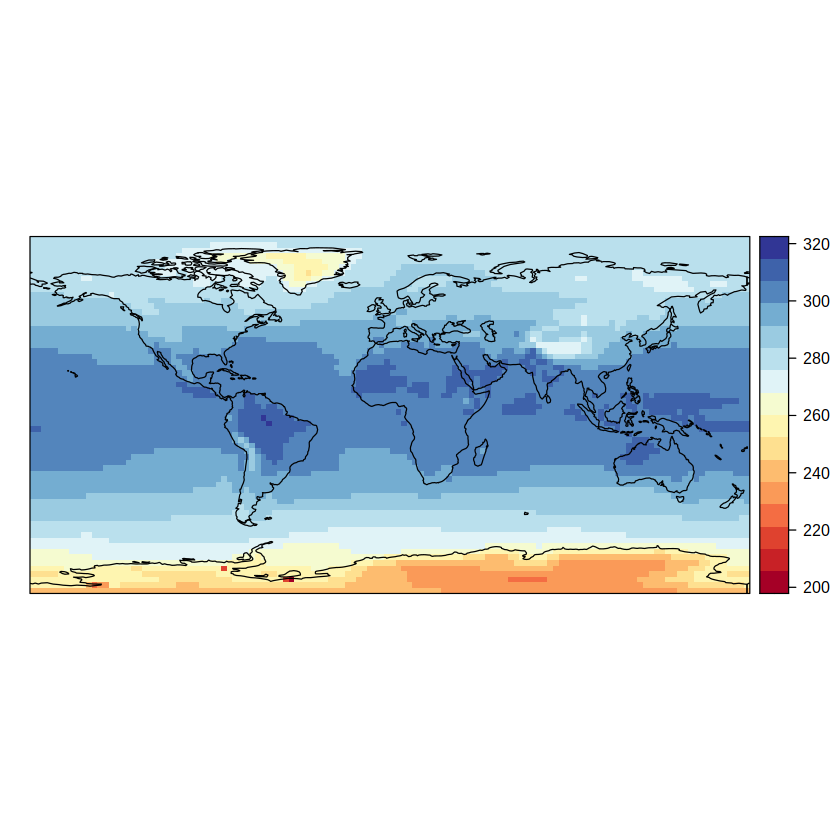

In [3]:
spatialPlot(climatology(data), backdrop.theme="coastline")